In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
URL_='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(URL_, header = None)

In [3]:
data.rename(columns={0: "x0", 1: "x1", 2: "x2", 3:"x3", 4:"y"}, inplace = True)

In [4]:
cluster_data = data[['x0','x1']].copy(deep=True)
cluster_data.sort_values(by=['x0','x1'], inplace=True)
cluster_array = np.array(cluster_data)

In [5]:
cluster_array[:10]

array([[4.3, 3. ],
       [4.4, 2.9],
       [4.4, 3. ],
       [4.4, 3.2],
       [4.5, 2.3],
       [4.6, 3.1],
       [4.6, 3.2],
       [4.6, 3.4],
       [4.6, 3.6],
       [4.7, 3.2]])

In [6]:
def distance_Euclid(p1,p2):
    
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist

In [7]:
def set_clusters(centroids, cluster_array):
    clusters = []
    for i in range(cluster_array.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(distance_Euclid(centroid, 
                                           cluster_array[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster[0])
    return clusters

In [8]:
def calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [9]:
def calc_centroid_variance(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array),
                            pd.DataFrame(clusters, 
                                         columns=['cluster'])], 
                           axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']\
                                     ==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, 
                                       current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [18]:
k = 3
cluster_vars = []
centroids = [cluster_array[i+2] for i in range(k)]
clusters = set_clusters(centroids, cluster_array)
initial_clusters = clusters
print(0, round(np.mean(calc_centroid_variance(clusters, cluster_array))))
for i in range(10):
    centroids = calc_centroids(clusters, cluster_array)
    clusters = set_clusters(centroids, cluster_array)
    cluster_var = np.mean(calc_centroid_variance(clusters, 
                                                 cluster_array))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 35
1 19
2 13
3 13
4 12
5 12
6 12
7 12
8 12
9 12
10 12


Text(0, 0.5, 'Mean Sum of Squared Deviations')

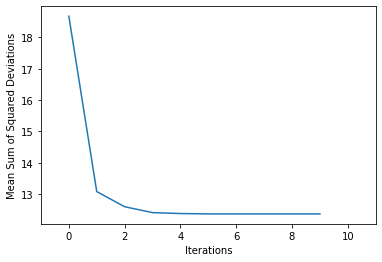

In [21]:
plt.subplots(figsize=(6,4))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.xlim(-1,11)
plt.ylabel('Mean Sum of Squared Deviations')

Text(0, 0.5, 'x1')

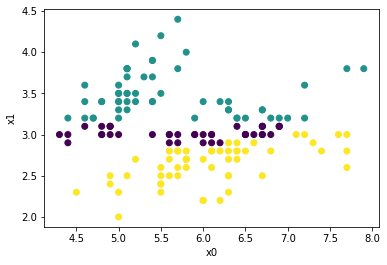

In [22]:
plt.subplots(figsize=(6,4))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=initial_clusters, cmap='viridis');
plt.xlabel('x0')
plt.ylabel('x1')

Text(0, 0.5, 'x1')

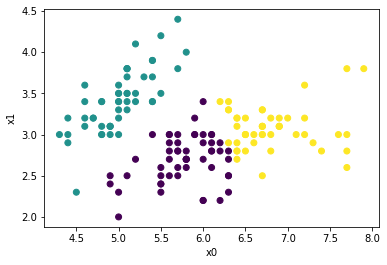

In [23]:
plt.subplots(figsize=(6,4))
plt.scatter(x=cluster_array[:,0], y=cluster_array[:,1], 
            c=clusters, cmap='viridis');
plt.xlabel('x0')
plt.ylabel('x1')

In [24]:
from sklearn import metrics

In [25]:
metrics.fowlkes_mallows_score(data['y'], clusters)

0.7737470115900668